# Tweets Relating to Covid-19 Analysis
#### Source: https://www.kaggle.com/smid80/coronavirus-covid19-tweets

Preprocessing:
1. To reduce data set size, take smaller random samples from each date
2. Delete quotes or retweets, etc.
3. Remove columns: reply_to_status_id, reply_to_user_id, reply_to_screen_name
4. Remove rows without country_code (make a separate dataframe for this)
    This will be purley for tweet counts from various countries

Analysis:
1. See which countries have the most tweets.*
2. Textblob for sentiment analysis. Potential questions: How sentiment differs from country, over time
3. ML clustering based on sentiment. (Review ML stuff)
4. Most popular tweets/tweets by people with most followers *
5. See number of followers, favs, etc. based on country or location *
6. Time series of total number of tweets in US over time. As well as total global tweets over time


## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import nltk
from textblob import TextBlob
from textblob import Word
from random import randint
import os
#from urllib.request import urlopen
#from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
"""
searches = ['hand sanitzer', 'toilet paper', 'wipes', 'soap']
url = "https://www.amazon.com/ref=nav_logo"
html = urlopen(url)
"""

'\nsearches = [\'hand sanitzer\', \'toilet paper\', \'wipes\', \'soap\']\nurl = "https://www.amazon.com/ref=nav_logo"\nhtml = urlopen(url)\n'

In [3]:
march_df = []
path = r'C:\Users\thead\Desktop\Summer 2020 ML Learning\Covid19AnalysisAndSentiment\Covid19March'
os.chdir(path)

for file in os.listdir():
    filename = os.fsdecode(file)#basically just returns a string..
    if filename.endswith('.CSV'):
        march_df.append(str(filename))

In [4]:
#Params: array of dataframes, and list of columns
def dropColumn(df_arr, columns):
    for i in range(0,len(df_arr)):
        df_arr[i] = df_arr[i].drop(columns, axis = 1)

In [5]:
def dropRow(df_arr,row):
    new_arr = [0]*len(df_arr)
    for i in range(0, len(df_arr)):
        df_arr[i][row] = df_arr[i][row].fillna(0)
        new_arr[i] = df_arr[i].loc[(df_arr[i][row] != 0)].reset_index()
    return new_arr

In [6]:
def randomTweet(df_arr):
    randDf = randint(0, len(df_arr)-1)
    randInd = randint(0, len(df_arr[randDf]['text'])-1)
    text = df_arr[randDf]['text'][randInd]
    screenName = df_arr[randDf]['screen_name'][randInd]
    return text, screenName

In [7]:
#Print most favorited
def mostFavorited(df_arr):
    for df in df_arr:
        maxFavs = max(df['favourites_count'])
        rowNum = list(df['favourites_count']).index(maxFavs)
        author = df['screen_name'][rowNum]
        retweets = df['retweet_count'][rowNum]
        followers = df['followers_count'][rowNum]
        tweet = df['text'][rowNum]
        time = df['created_at'][rowNum]
        print(maxFavs,' Favorites, ',retweets,' Retweets and ',followers,' Followers - ', author)
        print("Time: ", time)
        print("Tweet: ", tweet,"\n----------------------------------------------------------")

In [8]:
#Print most popular
def mostFollowers(df_arr):
    for df in df_arr:
        maxFol = max(df['followers_count'])
        rowNum = list(df['followers_count']).index(maxFavs)
        author = df['screen_name'][rowNum]
        print(maxFol,' - ', author)

In [9]:
for i in range(0,len(march_df)):
    march_df[i] = pd.read_csv(march_df[i])

In [10]:
for i in range(0,len(march_df)):
    march_df[i] = march_df[i].drop(['reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name'],axis = 1)

In [11]:
april_df = []
apath = r'C:\Users\thead\Desktop\Summer 2020 ML Learning\Covid19AnalysisAndSentiment\Covid19April'
os.chdir(apath)

for file in os.listdir():
    filename = os.fsdecode(file)#basically just returns a string..
    if filename.endswith('.CSV'):
        april_df.append(str(filename))

In [12]:
for i in range(0,len(april_df)):
    april_df[i] = pd.read_csv(april_df[i])

In [13]:
for i in range(0,len(april_df)):
    april_df[i] = april_df[i].drop(['reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name'],axis = 1)

In [14]:
dropColumn(april_df, ['account_lang', 'place_type'])
dropColumn(march_df, ['account_lang','place_type'])

In [15]:
march_df[0].head()

,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,False,False,300,0,NaN,NaN,1008,41,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,TweetDeck,False,False,1030,1,NaN,NaN,90,316,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,False,False,604,0,NaN,NaN,136,457,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,False,False,1827,0,NaN,NaN,1549,170,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,TweetDeck,False,False,723,0,NaN,NaN,868,125,2016-10-19T22:05:03Z,False,es


### Below are dataframes with rows of NaN country_code dropped

In [16]:
march_df_cc = dropRow(march_df, 'country_code')

In [17]:
april_df_cc = dropRow(april_df,'country_code')

In [18]:
april_df_cc[0].head()

,index,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,157,1250574631616069641,626679510,2020-04-16T00:00:01Z,SeanDMackNYC,This should make my meetings way more producti...,Twitter for Android,False,False,1096,0,US,"Manhattan, NY",3891,4178,2012-07-04T16:48:10Z,False,en
1,260,1250574678541942786,794120640,2020-04-16T00:00:12Z,josemarceloroch,Vendo a quantidade de dificuldades que princip...,Twitter for Android,False,False,834,0,BR,"Caldas Novas, Brasil",81,396,2012-08-31T15:44:33Z,False,pt
2,268,1250574683453431808,1211950858746785793,2020-04-16T00:00:13Z,EDNewsChina,"Grand Bazaar, a famous tourist site and a good...",Twitter for iPhone,False,False,3843,0,CN,"Beijing, People's Republic of China",6182,109,2019-12-31T10:03:22Z,False,en
3,271,1250574684468531200,43571133,2020-04-16T00:00:13Z,IronsMeroL,Mañana empieza la #Fase3 del #COVID_19 y tenem...,Twitter for iPhone,False,False,312,0,MX,"Benito Juárez, Distrito Federal",150,40,2009-05-30T18:38:36Z,False,es
4,352,1250574719692275714,418957441,2020-04-16T00:00:22Z,MeducaPma,"""Los docentes deberán acogerse al Decreto Ejec...",Twitter for Android,False,False,5996,19,PA,Panama,82779,100,2011-11-22T19:37:37Z,False,es


In [19]:
#Prints 5 random tweets of April
for i in range(0,5):
    text, screenName = randomTweet(april_df_cc)
    print(text,' - ',screenName,'\n------------------------------------------------------\n')

@OlcinoMan No hablo de aplausos. Hablo de realizar test. Que se lo hagan a futbolistas y no a sanitarios que son quienes están directamente con los pacientes con #COVID19  -  JorgeLimia 
------------------------------------------------------

I cried a tear, you wiped it dry I was confused, you cleared my mind
I sold my soul, you bought it back for me And held me up and gave me dignity Somehow you needed me
You gave me strength to stand alone again To face the world out on my own again I needed you #covid19 #StayHome https://t.co/BB8Y6UvdnC  -  ShaneGillespie 
------------------------------------------------------

I’m Zoomed out after 2 solid days! Good content &amp; mastering the process &amp; the daily routine using the @TradeTheFifth_ indicators. Can’t wait until #COVID19 is over &amp; we can have the live in-person class! https://t.co/5Pz3Lx5Lqz  -  SnellW 
------------------------------------------------------

Siamo schiacciati dal dolore.
Conte gestirlo? L'uomo può capire il ma

### Popular tweets of March

In [20]:
#Most popular tweets of March:
mostFavorited(march_df)

1536144  Favorites,  48  Retweets and  216960  Followers -  David_Leavitt
Time:  2020-03-29T18:30:58Z
Tweet:  Seeing your friends after the #coronavirus quarantine ends https://t.co/AQrU0s0ScV 
----------------------------------------------------------
1537325  Favorites,  74  Retweets and  217114  Followers -  David_Leavitt
Time:  2020-03-30T21:31:36Z
Tweet:  Trump is an absolute narcissistic asshole. At the #coronavirus briefing he started talking about his hair.

"My hair is blowing in the wind and it’s mine. That’s one thing you can’t get away with if you’re president." 
----------------------------------------------------------
1537913  Favorites,  34  Retweets and  217309  Followers -  David_Leavitt
Time:  2020-03-31T22:09:15Z
Tweet:  "Yes. Over 100,000 Americans will die from #Coronavirus"

That means it's probably going to be way more

😰 
----------------------------------------------------------
1538285  Favorites,  226  Retweets and  217530  Followers -  David_Leavitt
Time:  

### Popular tweets of April

In [21]:
#Most popular tweets of April:
mostFavorited(april_df)

1989090  Favorites,  1  Retweets and  22629  Followers -  ChelseaAMusic
Time:  2020-04-16T19:59:57Z
Tweet:  Ever since the #COVID19 epidemic began i think I've only taken 2 naps 😴 the whole time that's how much my anxiety has been bothering me it's so not fun at all!! 😢😭 
----------------------------------------------------------
1352107  Favorites,  2  Retweets and  73040  Followers -  GokhanAkar
Time:  2020-04-17T11:13:16Z
Tweet:  Geçen Gün Canlı Yayında Teknik Bir Kaza Sonucu Tavşan Olarak Şarkı Söylemeye Devam Ettikten Sonra
Bu Akşam Saat 20.00 da
Instagram Hesabımda
Civciv 🐥 Olarak
Şarkı Söylemeyi Düşünüyorum...
Tüm Arkadaşlar da Civciv Olarak Yayınıma Katılsınlar Lütfen.
🐥🐥🐥♥️
#EvdeKal #coronavirus https://t.co/m8y6xcx6dj 
----------------------------------------------------------
1990673  Favorites,  0  Retweets and  22639  Followers -  ChelseaAMusic
Time:  2020-04-18T21:19:51Z
Tweet:  Very true we are One World 🌎 it's time we start acting like one instead of fighting with one a

## Dividing data by country_code

In [22]:
top_codes = april_df_cc[0]['country_code'].value_counts()[0:31]#one day find an autmoatic way to get values >100
print(top_codes[0:5])

US    5827
IN    2814
GB    2494
ES    1144
BR     898
Name: country_code, dtype: int64


## Groupby analysis
Grouping by sum of followers, retweets, etc. for each country code

Preprocessing:
1. Concatenate individual March and April DataFrames. Concatenate two major dataframes for March and April
2. Drop categorical columns for groupby

In [23]:
def concatenate(arr_df):
    firstArr = arr_df[0]
    for i in range(1,len(arr_df)):
        firstArr = pd.concat([firstArr,arr_df[i]], axis = 0)
    return firstArr.reset_index()

In [24]:
april_full_cc = concatenate(april_df_cc)

In [25]:
march_full_cc = concatenate(march_df_cc)

In [26]:
full_cc = pd.concat([march_full_cc,april_full_cc],axis = 0)

In [27]:
full_cc_grouped = full_cc.iloc[:,10:]
full_cc_grouped = full_cc_grouped.drop(['place_full_name','account_created_at','verified','lang'], axis = 1)
full_cc_grouped.head()

,favourites_count,retweet_count,country_code,followers_count,friends_count
0,534,0,IT,1241,430
1,1256,0,US,375,762
2,1561,4,MX,361,1035
3,1971,1,PA,1987,584
4,1205,1,CL,771,3590


In [28]:
full_cc_grouped_final = full_cc_grouped.groupby('country_code').sum().reset_index()
full_cc_grouped_final = full_cc_grouped_final.sort_values(by = ['favourites_count','followers_count'], ascending = False)
full_cc_grouped_final.head()

,country_code,favourites_count,retweet_count,followers_count,friends_count
206,US,3235269729,294069,936515244,509730576
68,GB,773514042,93283,189193762,124015321
94,IN,610958422,146578,693637932,54271780
60,ES,398937502,66082,109394067,52567766
35,CA,368298451,68143,90770241,42659274


In [29]:
countryTweetCount = full_cc_grouped['country_code'].value_counts()

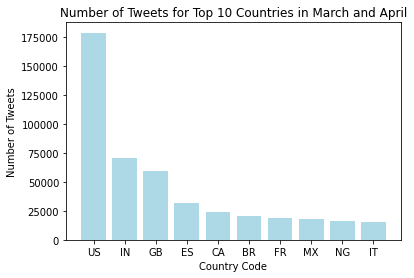

In [30]:
cc = list(countryTweetCount.index)[0:10]
counts = list(countryTweetCount)[0:10]
plt.bar(cc,counts, color = 'lightblue')
plt.xlabel("Country Code")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets for Top 10 Countries in March and April")
plt.show()

## Grouped bar chart/Popularity assessment

Assessing Twitter popularity for each country as a whole

In [31]:
c = full_cc_grouped_final['country_code'][0:10]
total_favs = full_cc_grouped_final['favourites_count'][0:10]
total_rt = full_cc_grouped_final['retweet_count'][0:10]
total_fol = full_cc_grouped_final['followers_count'][0:10]

total_fr = full_cc_grouped_final['friends_count'][0:10]#may not be an accurate representation, There would be alot of repeats

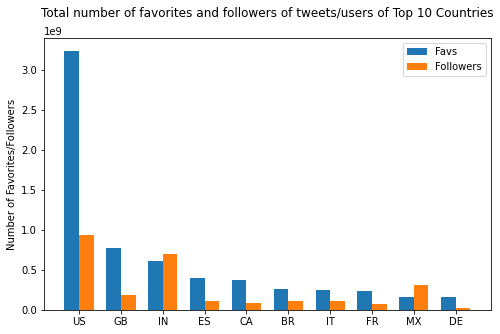

In [32]:
x = np.arange(len(c))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, total_favs, width, label='Favs')
rects2 = ax.bar(x + width/2, total_fol, width, label='Followers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Favorites/Followers')
ax.set_title('Total number of favorites and followers of tweets/users of Top 10 Countries\n')
ax.set_xticks(x)
ax.set_xticklabels(c)
ax.legend()


plt.show()

## US Tweets Over Time

Get total number of tweets for each consecutive day in the US. See how number of tweets changes over time.

In [33]:
def AddDateColumn(df):
    new_df = df
    new_df['created_at'] = pd.to_datetime(new_df['created_at'])
    new_df.insert (2, "Date", new_df['created_at'].dt.date.astype('str'))
    new_df = new_df.sort_values(by = ['Date'], ascending = True)
    return new_df

In [34]:
full_cc_us = full_cc.loc[(full_cc['country_code'] == 'US')]
full_cc_us = full_cc_us.drop(['level_0'], axis = 1).reset_index()

In [35]:
full_cc_us['created_at'] =  pd.to_datetime(full_cc_us['created_at'])
full_cc_us.insert (2, "Date", full_cc_us['created_at'].dt.date.astype('str'))
#full_cc_us['Date'] = full_cc_us['created_at'].dt.date.astype('str')
full_cc_us = full_cc_us.sort_values(by = ['Date'], ascending = True)
full_cc_us.head()

,level_0,index,Date,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,1,293,2020-03-29,1244051714933772293,990070195,2020-03-29 00:00:16+00:00,realJohn_Stiles,@ClayTravis FLU? This seems fishy to me these ...,Twitter for iPad,False,False,1256,0,US,"Franklin, TN",375,762,2012-12-05T03:00:33Z,False,en
5770,22906,426257,2020-03-29,1244339906727628804,710928151833124864,2020-03-29 19:05:27+00:00,tellonatascha,Florida Coronavirus 24/7 Bilingual Hotline ☎️ ...,Twitter for iPhone,False,False,499,1,US,"Miami Beach, FL",423,774,2016-03-18T20:37:34Z,False,en
5769,22904,426220,2020-03-29,1244339889543446530,28605207,2020-03-29 19:05:23+00:00,sheryllozicki,There is no reason to triage your groceries. T...,Twitter for iPhone,False,False,855,0,US,"Michigan, USA",13289,9996,2009-04-03T17:06:19Z,False,en
5768,22900,426109,2020-03-29,1244339842361720832,301183644,2020-03-29 19:05:11+00:00,Sopiesmyesdog,What a piece of crap he is!!! Once a reality s...,Twitter for iPhone,True,False,5891,0,US,"New Hampshire, USA",81,1358,2011-05-19T01:18:25Z,False,en
5767,22896,426049,2020-03-29,1244339825206890496,326287282,2020-03-29 19:05:07+00:00,QueenBdmv,Looking For Some New Guests To Interview LIVE ...,Instagram,False,False,1003,1,US,"Center, TX",950,1308,2011-06-29T17:37:56Z,False,en


In [36]:
dateCounts = full_cc_us['Date'].value_counts()
totalsPerDay = list(dateCounts)
days = list(dateCounts.index)

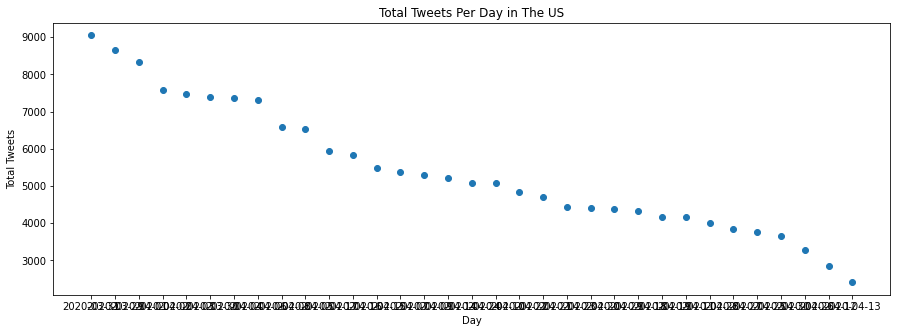

In [37]:
plt.figure(figsize = (15,5))#figure out a way to make nicer and not so squished x-axis.....
plt.scatter(days, totalsPerDay)
plt.xlabel('Day')
plt.ylabel('Total Tweets')
plt.title('Total Tweets Per Day in The US')
plt.show()

## Global Number of Tweets Over Time

Do the same as above, but for all tweets across all countries

In [38]:
global_df = AddDateColumn(full_cc)

In [39]:
global_df.head()

,level_0,index,Date,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,0,285,2020-03-29,1244051710143856640,29199408,2020-03-29 00:00:15+00:00,AMarchettiT,Cancellato il Salone dell’auto di #Detroit pre...,Twitter for iPad,False,False,534,0,IT,"Rome, Lazio",1241,430,2009-04-06T13:29:14Z,False,it
20348,20348,381829,2020-03-29,1244320686203711488,38278699,2020-03-29 17:49:04+00:00,frankblaze,I have hope with our Covid19 numbers They’re s...,Twitter for iPhone,False,False,1713,0,US,"Georgia, USA",111,634,2009-05-06T21:17:06Z,False,en
20347,20347,381808,2020-03-29,1244320672270020608,1039811790933127174,2020-03-29 17:49:01+00:00,Deepeshpatekarr,Great work by @ipca \n\nI hope it will be a ve...,Twitter for Android,False,False,177,0,IN,"Indore, India",38,63,2018-09-12T09:43:44Z,False,en
20346,20346,381777,2020-03-29,1244320665777381377,27008217,2020-03-29 17:48:59+00:00,MaGioZal,Enough said. #Brasil #COVID19 https://t.co/Kpv...,Twitter for iPhone,False,False,643,0,BR,"Sao Paulo, Brazil",562,404,2009-03-27T13:59:01Z,False,en
20345,20345,381761,2020-03-29,1244320655107067907,313078033,2020-03-29 17:48:57+00:00,brianfraga,Requesting prayers 🙏 for a high school friend ...,Twitter for Android,False,False,20913,2,US,"Fall River, MA",1775,4575,2011-06-08T03:29:28Z,False,en


In [40]:
globalDC = global_df['Date'].value_counts()
globalTotals = list(globalDC)
days = list(globalDC.index)

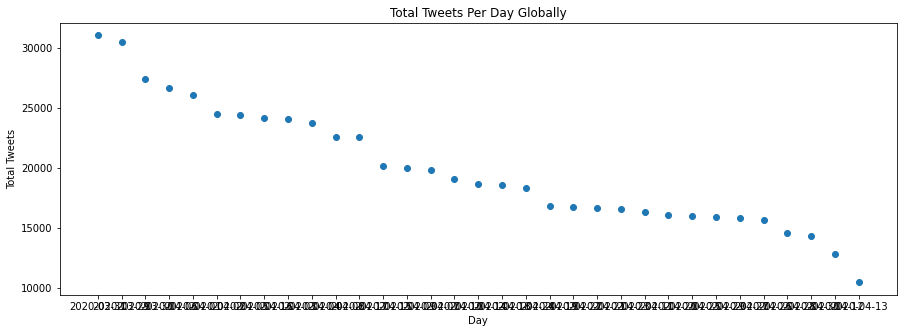

In [41]:
plt.figure(figsize = (15,5))#figure out a way to make nicer and not so squished x-axis.....
plt.scatter(days, globalTotals)
plt.xlabel('Day')
plt.ylabel('Total Tweets')
plt.title('Total Tweets Per Day Globally')
plt.show()

## Analyzing Tweets with TextBlob
https://textblob.readthedocs.io/en/dev/
https://textblob.readthedocs.io/en/dev/quickstart.html#quickstart

1. Get sentiment scores for tweets
2. Get total number of sentences in a tweet
3. Get count of times Donald Trump/Trump is mentioned in a tweet
4. How avg sentiment score per day changes.
5. Find most popular nouns/noun phrases

In [42]:
#These are required to access certain members of TextBlob ;\
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thead\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\thead\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\thead\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## Sentiment Scores

Currently just using full_cc, which omits many tweets without a country_code

In [43]:
import multiprocessing

In [44]:
pool = multiprocessing.Pool()

In [45]:
full_cc_en = full_cc.loc[(full_cc['lang'] == 'en')].drop(['index','level_0'],axis = 1).reset_index()
full_cc_en.head()#only English tweets that have a country code

,index,Date,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,1,2020-03-29,1244051714933772293,990070195,2020-03-29 00:00:16+00:00,realJohn_Stiles,@ClayTravis FLU? This seems fishy to me these ...,Twitter for iPad,False,False,1256,0,US,"Franklin, TN",375,762,2012-12-05T03:00:33Z,False,en
1,5,2020-03-29,1244051767056191489,2854839686,2020-03-29 00:00:29+00:00,brightpinkinLA,@netflix omg!!! Ozark ending was to die for!!!...,Twitter for iPhone,False,False,1284,0,US,"Los Angeles, CA",187,1603,2014-10-13T21:49:00Z,False,en
2,10,2020-03-29,1244051810500988928,918988532022218752,2020-03-29 00:00:39+00:00,forourchildern,I don't think there is gd leadership across th...,Twitter for Android,False,False,14874,0,US,"Manhattan, NY",441,398,2017-10-13T23:55:14Z,False,en
3,11,2020-03-29,1244051822320508929,31746605,2020-03-29 00:00:42+00:00,JusteneEwing,In a change of conversation from #covid19 here...,Twitter for iPhone,False,False,6984,0,GB,"Dedridge, Scotland",1607,846,2009-04-16T12:17:12Z,False,en
4,12,2020-03-29,1244051822354018304,33373205,2020-03-29 00:00:42+00:00,cwhitcher1791,Any other hospital doing this? Our engineering...,Twitter for iPhone,False,False,4721,2,US,"Alexandria, LA",365,777,2009-04-20T01:42:20Z,False,en


In [46]:
full_cc_en.insert (8, "Polarity", 0)

In [47]:
full_cc_en.insert (9, "Subjectivity", 0)

In [48]:
def sentiment(text):
    tBlob = TextBlob(str(text)).sentiment
    return tBlob.polarity, tBlob.subjectivity

In [49]:
def trumpCounts(text):
    tBlob = TextBlob(text)
    tCounts = int(tBlob.word_counts['trump'])
    return tCounts

In [50]:
polarities = []
subjectivs = []
texts = full_cc_en['text']

In [51]:
for i in range(0, len(texts)):#there's gotta be a parallel/vectorized way to do this...
    polarities.append(sentiment(texts[i])[0])
    subjectivs.append(sentiment(texts[i])[1])

In [52]:
full_cc_en['Polarity'] = polarities
full_cc_en['Subjectivity'] = subjectivs

In [53]:
full_cc_en.head(2)

,index,Date,status_id,user_id,created_at,screen_name,text,source,Polarity,Subjectivity,...,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,1,2020-03-29,1244051714933772293,990070195,2020-03-29 00:00:16+00:00,realJohn_Stiles,@ClayTravis FLU? This seems fishy to me these ...,Twitter for iPad,0.0,0.0,...,False,1256,0,US,"Franklin, TN",375,762,2012-12-05T03:00:33Z,False,en
1,5,2020-03-29,1244051767056191489,2854839686,2020-03-29 00:00:29+00:00,brightpinkinLA,@netflix omg!!! Ozark ending was to die for!!!...,Twitter for iPhone,0.2,0.2,...,False,1284,0,US,"Los Angeles, CA",187,1603,2014-10-13T21:49:00Z,False,en


In [54]:
full_cc_en.to_csv(r'C:\Users\thead\Desktop\Summer 2020 ML Learning\Covid19AnalysisAndSentiment\tweets3to4.csv', index = False)

In [55]:
full_cc_en.insert (10, "Trump_Counts", 0)

In [56]:
trumpCountsList = []
text = list(full_cc_en['text'])
for i in range(0,len(text)):
    trumpCountsList.append(trumpCounts(str(text[i])))

In [57]:
full_cc_en['Trump_Counts'] = trumpCountsList

In [58]:
sentimentNegative = full_cc_en.loc[(full_cc_en['Polarity']<0)].reset_index()
sentimentPositive = full_cc_en.loc[(full_cc_en['Polarity']>0)].reset_index()
sentimentNeutral = full_cc_en.loc[(full_cc_en['Polarity']==0)].reset_index()

In [59]:
sentimentNegative.head(3)

,level_0,index,Date,status_id,user_id,created_at,screen_name,text,source,Polarity,...,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,2,10,2020-03-29,1244051810500988928,918988532022218752,2020-03-29 00:00:39+00:00,forourchildern,I don't think there is gd leadership across th...,Twitter for Android,-0.525000,...,False,14874,0,US,"Manhattan, NY",441,398,2017-10-13T23:55:14Z,False,en
1,4,12,2020-03-29,1244051822354018304,33373205,2020-03-29 00:00:42+00:00,cwhitcher1791,Any other hospital doing this? Our engineering...,Twitter for iPhone,-0.141667,...,False,4721,2,US,"Alexandria, LA",365,777,2009-04-20T01:42:20Z,False,en
2,12,23,2020-03-29,1244052102957031425,186178942,2020-03-29 00:01:49+00:00,CarolineRode,Shout out to my handful of friends who put up ...,Twitter for Android,-0.182292,...,False,29319,0,US,"Minneapolis, MN",1506,1044,2010-09-02T19:39:30Z,True,en


In [60]:
sentimentPositive.head(3)

,level_0,index,Date,status_id,user_id,created_at,screen_name,text,source,Polarity,...,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,1,5,2020-03-29,1244051767056191489,2854839686,2020-03-29 00:00:29+00:00,brightpinkinLA,@netflix omg!!! Ozark ending was to die for!!!...,Twitter for iPhone,0.200000,...,False,1284,0,US,"Los Angeles, CA",187,1603,2014-10-13T21:49:00Z,False,en
1,3,11,2020-03-29,1244051822320508929,31746605,2020-03-29 00:00:42+00:00,JusteneEwing,In a change of conversation from #covid19 here...,Twitter for iPhone,0.250000,...,False,6984,0,GB,"Dedridge, Scotland",1607,846,2009-04-16T12:17:12Z,False,en
2,7,16,2020-03-29,1244051953283448833,861254337938456580,2020-03-29 00:01:13+00:00,lifeakua,...We will do our best to make you smile with ...,Twitter for iPad,0.341667,...,False,178,0,US,"New Canaan, CT",2956,472,2017-05-07T16:20:10Z,False,en


In [61]:
sentimentPositive.shape

(189594, 23)

In [62]:
sentimentNegative.shape

(70326, 23)

### Some of the most positive tweets

In [63]:
posPolarity = sentimentPositive['Polarity']
posText= sentimentPositive['text']
posDate = sentimentPositive['Date']
count = 0
usedDates = []
for i in range(0, len(sentimentPositive)):
    if(posPolarity[i]==1 and posDate[i] not in usedDates):
        count +=1
        usedDates.append(posDate[i])
        print("Date: ",posDate[i])
        print("Polarity:", posPolarity[i])
        print(posText[i],"\n------------------")
        if count>10:
            break

Date:  2020-03-29
Polarity: 1.0
YAAAASSSS I LOVE THIS IDEA!! IM DOING IT!! #ReTweetThis #SanAntonio #QuidProCOVID19 #Covid_19 #ShineBright 🇨🇱 https://t.co/Y7m5q5vi2F 
------------------
Date:  2020-03-30
Polarity: 1.0
LMAO!!! 

#covid_19 #familybonding #gamenight #momlife #eggies #quarantinefun @ Barrhaven, Ontario https://t.co/cQnjzbjTtY 
------------------
Date:  2020-03-31
Polarity: 1.0
I got weed, and money. Lol!
#COVID19 #coronavirus https://t.co/rxM2gxabXe 
------------------
Date:  2020-04-01
Polarity: 1.0
We are now officially on #StayAtHome #lockdown here in #Arizona.

#COVID19 #Coronavirus #AZTogether 

Best of luck to everyone…we’ll get through this 👍 https://t.co/503Ljob5bQ 
------------------
Date:  2020-04-02
Polarity: 1.0
Excellent suggestions for those who may be facing eviction from Dayton Mayor @nanwhaley. #CoronavirusOutbreak https://t.co/ekzhzWW0wj 
------------------
Date:  2020-04-03
Polarity: 1.0
If I have to watch any more peppa pig, this is going to happen!!!! 

### Some of the most negative tweets

In [64]:
negPolarity = sentimentNegative['Polarity']
negText= sentimentNegative['text']
negDate = sentimentNegative['Date']
count = 0
usedDates = []
for i in range(0, len(sentimentNegative)):
    if(negPolarity[i]==-1 and negDate[i] not in usedDates):
        count +=1
        usedDates.append(negDate[i])
        print("Date: ",negDate[i])
        print("Polarity:", negPolarity[i])
        print(negText[i],"\n------------------")
        if count>10:
            break

Date:  2020-03-29
Polarity: -1.0
Even playing #monopoly you can get nasty #Cough going around and property level drops 1 point

😀

#StaySafe from #covid19 @ Eden Prairie, Minnesota https://t.co/RjwSRcwt1F 
------------------
Date:  2020-03-30
Polarity: -1.0
@viajaVolaris has to be the worst #airline to handle concerns about #Covid_19 
------------------
Date:  2020-03-31
Polarity: -1.0
This is disgusting! I still wake each day to thank🙏🏻God #Trump was elected our 45th #POTUS! TY you #TammyBruce &amp; @dbongino for sharing. 
Imagine if @HillaryClinton or @JoeBiden were in charge of the #COVID19 pandemic. What a💩show we’d be witnessing! #WinningWithTrump 🇺🇸♥️💯#KAG https://t.co/f2xuwoKWoz 
------------------
Date:  2020-04-01
Polarity: -1.0
Why we’re in the horrible situation in USA. #COVID19 #coronavirus #COVIDー19 #CoronavirusUSA https://t.co/nFhPjfdkZH 
------------------
Date:  2020-04-02
Polarity: -1.0
LISTEN LIFE IS NOT THIS BAD THAT MAKE YOU WANNA DO THIS!! #ongodonme #please #dontg

### Dataframe including only tweets where Trump is mentioned

In [65]:
trumpCounts_df = full_cc_en[['Date','Polarity','Subjectivity','Trump_Counts','text']].loc[(full_cc_en['Trump_Counts']>0)].reset_index()
trumpCounts_df.head()

,index,Date,Polarity,Subjectivity,Trump_Counts,text
0,34,2020-03-29,-0.200000,0.200000,1,I think Trump could be in trouble. #Covid_19 h...
1,137,2020-03-29,0.200000,0.100000,1,🖕🏾👨🏾‍🦲🖕🏾\n\n#Trump wants his signature to appe...
2,283,2020-03-29,-0.431818,0.727273,1,The #Coronavirus has exposed the #UnitedState...
3,294,2020-03-29,0.144444,0.577778,1,BREAKING: President Trump announces he’s recom...
4,314,2020-03-29,-0.141667,0.505556,1,The curve in the USA is flattening - but on th...


In [66]:
trumpTexts = trumpCounts_df['text']
for i in range(0,5):
    print(trumpTexts[randint(0,len(trumpTexts)-1)],"\n-----------------")

President #Trump Is Providing Relief For Workers Impacted By The #Coronavirus https://t.co/pbCoVlETMS 
-----------------
( see : https://t.co/4VnV5r1kxr ) * Join/ re-watch #CP’s #WatchParty on Fb Live for @realDonaldTrump’s #briefing re: #COVID19/#Corona/ #CoronaVirus on 4.14.20.tues @ 3:30 PM. *
 
#JohnPhillipRubalcaba #JohnRubalcaba #Chandler #ChandlerArizona #ChandlerPeople #ChandlerPeeps #Trump https://t.co/Uf9PBM2gES 
-----------------
Maryland sent out an emergency alert after receiving more than 100 calls on consuming disinfectant as a possible treatment to #COVID19, according to the governor's office.

The calls came after President Donald Trump suggested using a disinfectant.

https://t.co/j5mM6kbH59 
-----------------
@MMMPeg59 @njterrie @pomsmama @CynthiaCoy8 @dorisat58862534 @ReporterPhoenix @kimmybeaa @pinewoodsdojo @LifeOnTheBeach7 @MOTRPolitics1 @Catlady628 @criteria681 @NaphiSoc @EMPRESSROOTSGAL @Starz_Wayne @CBCalamity @Scott_In_Worc @graceslick77 @brainboomr22 @jimmy_

### Greatest mentions of Trump

In [67]:
tCountsList = list(trumpCounts_df['Trump_Counts'])
polarityList = list(trumpCounts_df['Polarity'])
subList = list(trumpCounts_df['Subjectivity'])
dList = list(trumpCounts_df['Date'])
for i in range(0, len(trumpTexts)):
    tCounts = tCountsList[i]
    if tCounts>=4:
        print("Date: %s" % dList[i])
        print('Trump Count: %d' % tCounts)
        print('Polarity: %f' % polarityList[i])
        print("Subjectivity: %f" % subList[i])
        print(trumpTexts[i],'\n-----------')

Date: 2020-04-01
Trump Count: 4
Polarity: -0.433333
Subjectivity: 0.400000
At #FakePresident #DonaldTrump’s #March 31, 2020, #PressConference, #Trump complained that #Democrats illegally #Impeached Trump — an issue no one cares about. #Americans are dying from #Covid19 because of Trump and all Trump cares about is that #Democrats impeached him illegally 
-----------
Date: 2020-04-11
Trump Count: 5
Polarity: -0.333333
Subjectivity: 0.933333
#tRump only cares about tRump. TRump does not care about: #CoronaVirus, #Democrates, #DeadPeople, #SickPeople only about tRump. He is a self-centered idiot. Trump has #BloodOnHisHands! https://t.co/QvfwbXlMfS 
-----------
Date: 2020-04-18
Trump Count: 4
Polarity: 0.048469
Subjectivity: 0.357823
This is the head to head polling between biden and trump, going back to last november long before trump made a bags of the #Covid_19 outbreak, at no stage in last 6 months is trump within an arses roar of biden yet the media "consensus" is trump is certain to 

In [68]:
sentimentPre = full_cc_en[['Date','Polarity','Subjectivity']].groupby('Date').mean().reset_index().sort_values(by = ['Date'], ascending= True)
sentimentPre.head()

,Date,Polarity,Subjectivity
0,2020-03-29,0.097376,0.378840
1,2020-03-30,0.103921,0.373169
2,2020-03-31,0.106102,0.377164
3,2020-04-01,0.104852,0.379545
4,2020-04-02,0.110406,0.380151


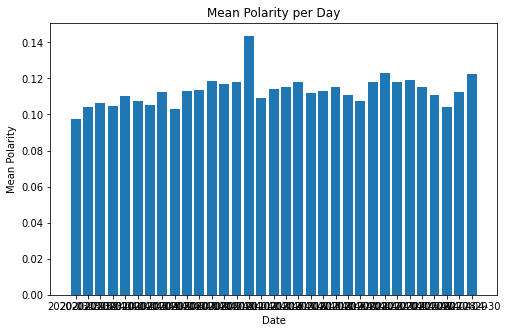

In [69]:
plt.figure(figsize = (8,5))
plt.bar(sentimentPre['Date'], sentimentPre['Polarity'])
plt.xlabel('Date')
plt.ylabel('Mean Polarity')
plt.title('Mean Polarity per Day')
plt.show()

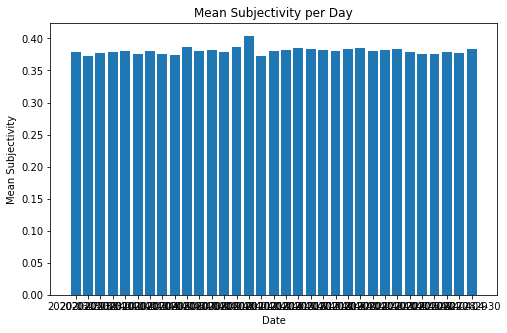

In [70]:
plt.figure(figsize = (8,5))
plt.bar(sentimentPre['Date'], sentimentPre['Subjectivity'])
plt.xlabel('Date')
plt.ylabel('Mean Subjectivity')
plt.title('Mean Subjectivity per Day')
plt.show()

In [71]:
#Negative counts per day
def barPlot(x,y, xlab, ylab, title):
    plt.figure(figsize = (8,5))
    plt.bar(x,y)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()

In [72]:
#Counts of neutral tweets per day
sentimentNeutral['counts'] = 1
sentimentPositive['counts'] = 1
sentimentNegative['counts'] = 1
sNeutralCounts = sentimentNeutral[['Date','counts']].groupby('Date').sum().reset_index()
sPosCounts = sentimentPositive[['Date','counts']].groupby('Date').sum().reset_index()
sNegCounts = sentimentNegative[['Date','counts']].groupby('Date').sum().reset_index()
sNegCounts.head()

,Date,counts
0,2020-03-29,3581
1,2020-03-30,2850
2,2020-03-31,3442
3,2020-04-01,3024
4,2020-04-02,2734


In [73]:
#Percentages of neutral, pos, and neg. Can put this on a stacked bar chart
dates = sPosCounts['Date']
neutralPercent = sNeutralCounts['counts']/(sNeutralCounts['counts']+sPosCounts['counts']+sNegCounts['counts'])
posPercent = sPosCounts['counts']/(sNeutralCounts['counts']+sPosCounts['counts']+sNegCounts['counts'])
negPercent = sNegCounts['counts']/(sNeutralCounts['counts']+sPosCounts['counts']+sNegCounts['counts'])

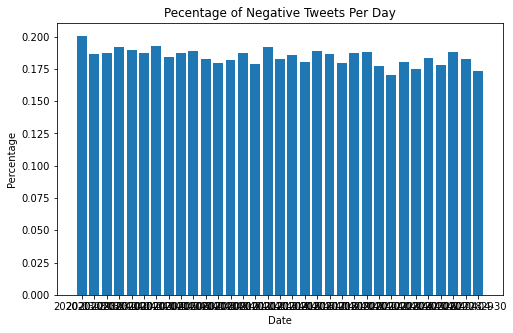

Avg Percentage of Negative Tweets pre day: 0.184454556065307
Avg Percentage of Neutral Tweets pre day:  0.3150280875783364
Avg Percentage of Positive Tweets pre day:  0.5005173563563567


In [74]:
barPlot(dates,negPercent, 'Date', 'Percentage', 'Pecentage of Negative Tweets Per Day')
print("Avg Percentage of Negative Tweets pre day:",np.mean(negPercent))
print("Avg Percentage of Neutral Tweets pre day: ",np.mean(neutralPercent))
print("Avg Percentage of Positive Tweets pre day: ",np.mean(posPercent))

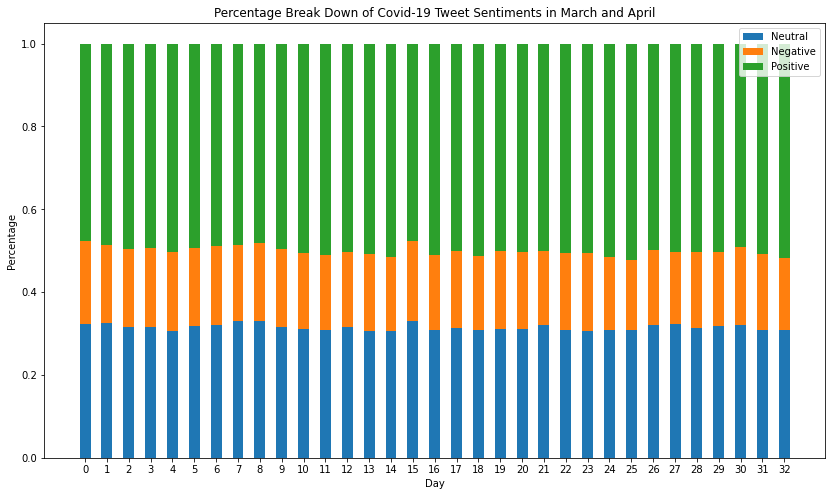

In [110]:
#Tutorial source: https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
N = len(dates)
neutral = neutralPercent
pos = posPercent
neg = negPercent 
ind = np.arange(N)
width = 0.5


bars = np.add(neutral, neg).tolist()#this is needed to get correct height for p3

plt.figure(figsize = (14,8))
p1 = plt.bar(ind, neutral, width)
p2 = plt.bar(ind, neg, width, bottom = neutral)
p3 = plt.bar(ind, pos, width, bottom = bars)


plt.legend((p1[0],p2[0],p3[0]),('Neutral','Negative','Positive'))
plt.title('Percentage Break Down of Covid-19 Tweet Sentiments in March and April')
plt.ylabel('Percentage')
plt.xlabel('Day')
plt.xticks(ind)
plt.show()